In [881]:
import numpy as np 
import pandas as pd

import os
for dirname, _, filenames in os.walk('C:\אריאל נושאי לימוד\מבוא למדעי הנתונים\KAGGLE\heart_attack_project'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

C:\אריאל נושאי לימוד\מבוא למדעי הנתונים\KAGGLE\heart_attack_project\classification heart attack.ipynb
C:\אריאל נושאי לימוד\מבוא למדעי הנתונים\KAGGLE\heart_attack_project\healthcare-dataset-stroke-data.csv


In [882]:
df = pd.read_csv("C:/אריאל נושאי לימוד/מבוא למדעי הנתונים/KAGGLE/heart_attack_project/healthcare-dataset-stroke-data.csv")
df.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1


# Features

#### ) id: unique identifier

#### 2) gender: "Male", "Female" or "Other"

#### 3) age: age of the patient

#### 4) hypertension: 0 if the patient doesn't have hypertension, 1 if the patient has hypertension

#### 5) heart_disease: 0 if the patient doesn't have any heart diseases, 1 if the patient has a heart disease

#### 6) ever_married: "No" or "Yes"

#### 7) work_type: "children", "Govt_jov", "Never_worked", "Private" or "Self-employed"

#### 8) Residence_type: "Rural" or "Urban"

#### 9) avg_glucose_level: average glucose level in blood

#### 10) bmi: body mass index

#### 11) smoking_status: "formerly smoked", "never smoked", "smokes" or "Unknown"*

#### 12) stroke: 1 if the patient had a stroke or 0 if not

In [883]:
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set()

In [884]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 5110 non-null   int64  
 1   gender             5110 non-null   object 
 2   age                5110 non-null   float64
 3   hypertension       5110 non-null   int64  
 4   heart_disease      5110 non-null   int64  
 5   ever_married       5110 non-null   object 
 6   work_type          5110 non-null   object 
 7   Residence_type     5110 non-null   object 
 8   avg_glucose_level  5110 non-null   float64
 9   bmi                4909 non-null   float64
 10  smoking_status     5110 non-null   object 
 11  stroke             5110 non-null   int64  
dtypes: float64(3), int64(4), object(5)
memory usage: 479.2+ KB


### null values only in bmi feature

In [885]:
def bar_chart(feature):
    had_stroke = df[df['stroke']==1][feature].value_counts()
    no_stroke = df[df['stroke']==0][feature].value_counts()
    df1 = pd.DataFrame([had_stroke,no_stroke])
    df1.index = ['had stroke','didnt have stroke']
    df1.plot(kind='bar',stacked=True ,figsize=(10,5))

#### a function to create bar charts

In [886]:
df.gender.value_counts()

Female    2994
Male      2115
Other        1
Name: gender, dtype: int64

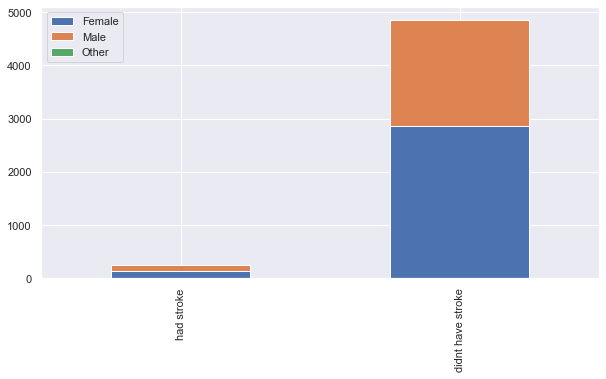

In [887]:
bar_chart('gender')

#### roughly the same amount of females and males had a stroke, more females than males hadn't had a stroke

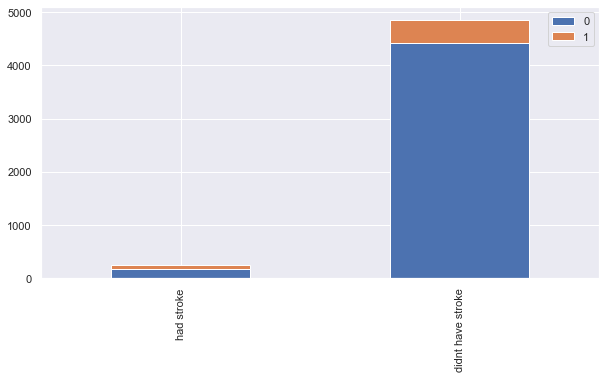

In [888]:
bar_chart('hypertension')

#### if you don't have hypertension you most likely will not have a stroke, if you do have it, there's a higher chance for you to have a stroke  

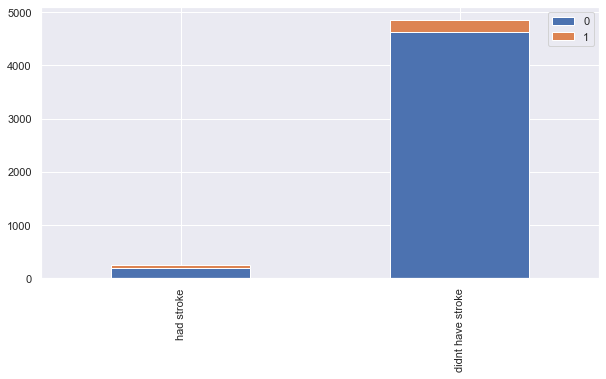

In [889]:
bar_chart('heart_disease')

#### the chance to have a stroke is way higher if you have heart diseases

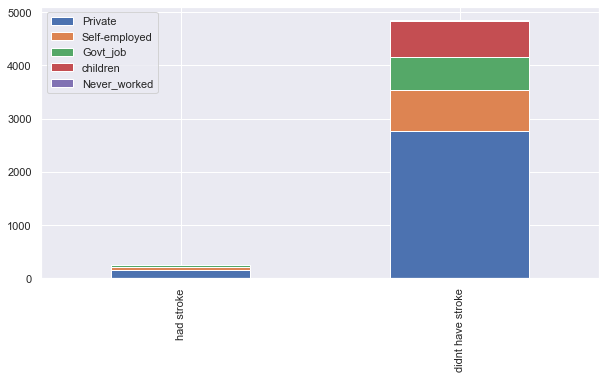

In [890]:
bar_chart('work_type')

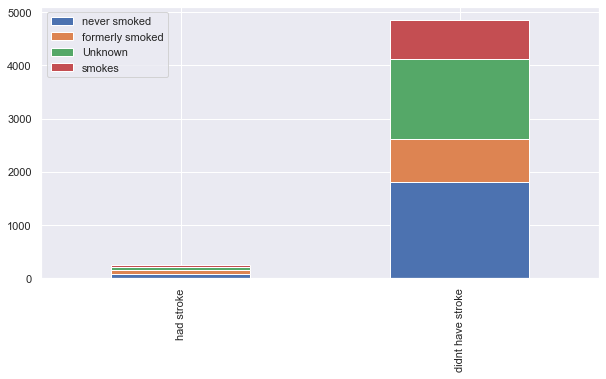

In [891]:
bar_chart('smoking_status')

# clean the data

#### only one person described as "other" in the gender feature so i'll remove it

In [892]:
df = df[df['gender'] != 'Other']

### let's convert each value of every categorial attribute in the dataframe to a column using "get_dummies".

In [893]:
og_df = df.copy()
df = pd.get_dummies(df, columns=['gender', 'hypertension', 'heart_disease', 'ever_married', 'work_type', 'Residence_type', 'smoking_status'])
df

,id,age,avg_glucose_level,bmi,stroke,gender_Female,gender_Male,hypertension_0,hypertension_1,heart_disease_0,...,work_type_Never_worked,work_type_Private,work_type_Self-employed,work_type_children,Residence_type_Rural,Residence_type_Urban,smoking_status_Unknown,smoking_status_formerly smoked,smoking_status_never smoked,smoking_status_smokes
0,9046,67.0,228.69,36.6,1,0,1,1,0,0,...,0,1,0,0,0,1,0,1,0,0
1,51676,61.0,202.21,NaN,1,1,0,1,0,1,...,0,0,1,0,1,0,0,0,1,0
2,31112,80.0,105.92,32.5,1,0,1,1,0,0,...,0,1,0,0,1,0,0,0,1,0
3,60182,49.0,171.23,34.4,1,1,0,1,0,1,...,0,1,0,0,0,1,0,0,0,1
4,1665,79.0,174.12,24.0,1,1,0,0,1,1,...,0,0,1,0,1,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5105,18234,80.0,83.75,NaN,0,1,0,0,1,1,...,0,1,0,0,0,1,0,0,1,0
5106,44873,81.0,125.20,40.0,0,1,0,1,0,1,...,0,0,1,0,0,1,0,0,1,0
5107,19723,35.0,82.99,30.6,0,1,0,1,0,1,...,0,0,1,0,1,0,0,0,1,0
5108,37544,51.0,166.29,25.6,0,0,1,1,0,1,...,0,1,0,0,1,0,0,1,0,0


### let's try to fill the null values in the bmi feature based in other features that are collerated to it

In [894]:
corr_matrix = df.corr()
corr_matrix["bmi"].sort_values(ascending=False)

bmi                               1.000000
ever_married_Yes                  0.341553
age                               0.333314
work_type_Private                 0.208205
avg_glucose_level                 0.175672
hypertension_1                    0.167770
smoking_status_never smoked       0.107847
smoking_status_formerly smoked    0.107463
smoking_status_smokes             0.088261
work_type_Govt_job                0.079526
work_type_Self-employed           0.072634
stroke                            0.042341
heart_disease_1                   0.041322
gender_Female                     0.026164
id                                0.003238
Residence_type_Rural              0.000293
Residence_type_Urban             -0.000293
gender_Male                      -0.026164
work_type_Never_worked           -0.028615
heart_disease_0                  -0.041322
hypertension_0                   -0.167770
smoking_status_Unknown           -0.270481
ever_married_No                  -0.341553
work_type_c

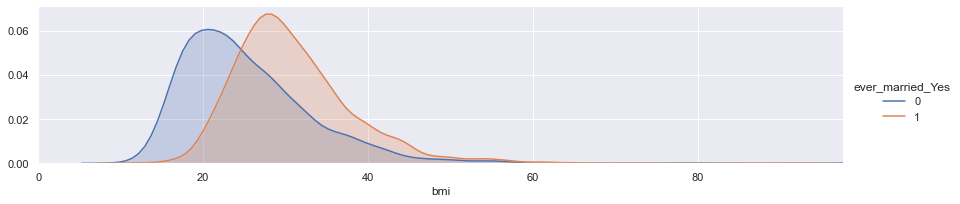

In [895]:
no_null = df.dropna(how='any', axis=0)

facet = sns.FacetGrid(no_null, hue="ever_married_Yes",aspect=4)
facet.map(sns.kdeplot,'bmi',shade= True)
facet.set(xlim=(0, df['bmi'].max()))
facet.add_legend()
plt.show()

#### average bmi of people who are not married is around 21.
#### average bmi of people who are married is around 30

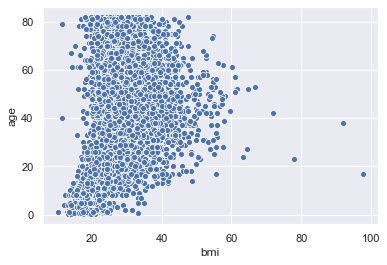

In [896]:
sns.scatterplot(x='bmi',y='age',data=no_null)

#### looks like the more average your age is, the higher your bmi

### let's use this information to fill the null values

In [897]:
for index, row in df.iterrows():
    if row.isnull().values.any():
        if row[12] == 1:
            bmi = 30
        else:
            bmi = 21
        bmi += abs(row[1]-40) * 1.5
        bmi /= 2
        df.iloc[index, df.columns.get_loc('bmi')] = bmi

In [898]:
df.dropna(axis=0, inplace=True)

df.reset_index(drop=True, inplace=True)
df.dropna()

,id,age,avg_glucose_level,bmi,stroke,gender_Female,gender_Male,hypertension_0,hypertension_1,heart_disease_0,...,work_type_Never_worked,work_type_Private,work_type_Self-employed,work_type_children,Residence_type_Rural,Residence_type_Urban,smoking_status_Unknown,smoking_status_formerly smoked,smoking_status_never smoked,smoking_status_smokes
0,9046,67.0,228.69,36.60,1,0,1,1,0,0,...,0,1,0,0,0,1,0,1,0,0
1,51676,61.0,202.21,30.75,1,1,0,1,0,1,...,0,0,1,0,1,0,0,0,1,0
2,31112,80.0,105.92,32.50,1,0,1,1,0,0,...,0,1,0,0,1,0,0,0,1,0
3,60182,49.0,171.23,34.40,1,1,0,1,0,1,...,0,1,0,0,0,1,0,0,0,1
4,1665,79.0,174.12,24.00,1,1,0,0,1,1,...,0,0,1,0,1,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5052,14180,13.0,103.08,18.60,0,1,0,1,0,1,...,0,0,0,1,1,0,1,0,0,0
5053,44873,81.0,125.20,45.00,0,1,0,1,0,1,...,0,0,1,0,0,1,0,0,1,0
5054,19723,35.0,82.99,30.60,0,1,0,1,0,1,...,0,0,1,0,1,0,0,0,1,0
5055,37544,51.0,166.29,25.60,0,0,1,1,0,1,...,0,1,0,0,1,0,0,1,0,0


## finding correlations between the features and the target

### let's look at the correlation between the chance of having a stroke and different features

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.


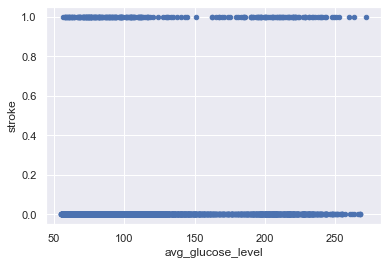

In [899]:
df.plot(kind='scatter', x='avg_glucose_level', y='stroke')

#### looks like the average glucose level of most people who had a stroke wasn't around the average value. it was either too low or too high.

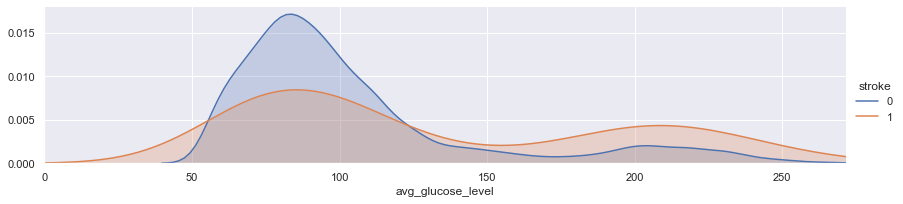

In [900]:
facet = sns.FacetGrid(df, hue="stroke",aspect=4)
facet.map(sns.kdeplot,'avg_glucose_level',shade= True)
facet.set(xlim=(0, df['avg_glucose_level'].max()))
facet.add_legend()
plt.show()

#### The second graph shows us that not only most people who had a stroke didn't have an average glucose level, but also the fact that most people who didn't have a stroke DID an average glucose level. this shows how important having an average glucose level is. 

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.


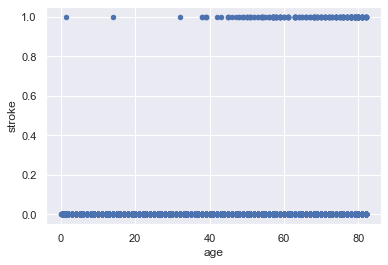

In [901]:
df.plot(kind='scatter', x='age', y='stroke')

#### we get some really useful information from this graph, looks like there are all most no people under the age of 40 that had a stroke. the chance of having a stroke increases a you age.

#### another way to look at the relation between age and stroke

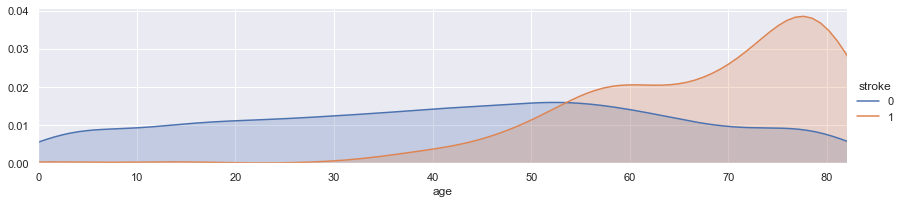

In [902]:
facet = sns.FacetGrid(df, hue="stroke",aspect=4)
facet.map(sns.kdeplot,'age',shade= True)
facet.set(xlim=(0, df['age'].max()))
facet.add_legend()
plt.show()

### let's look at bmi and stroke

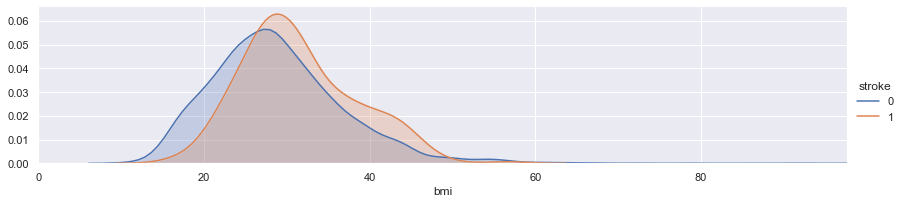

In [903]:
facet = sns.FacetGrid(df, hue="stroke",aspect=4)
facet.map(sns.kdeplot,'bmi',shade= True)
facet.set(xlim=(0, df['bmi'].max()))
facet.add_legend()
plt.show()

#### the averages of bmi for people who had a stroke and people who hadn't are really close, around 30 bmi.

In [904]:
corr_matrix = df.corr()
corr_matrix["stroke"].sort_values(ascending = False)

stroke                            1.000000
age                               0.246770
heart_disease_1                   0.137908
avg_glucose_level                 0.134970
hypertension_1                    0.129911
ever_married_Yes                  0.108714
bmi                               0.072727
smoking_status_formerly smoked    0.065181
work_type_Self-employed           0.062434
Residence_type_Urban              0.015190
work_type_Private                 0.011923
smoking_status_smokes             0.010133
gender_Male                       0.009449
id                                0.004503
work_type_Govt_job                0.002853
smoking_status_never smoked      -0.005135
gender_Female                    -0.009449
work_type_Never_worked           -0.015043
Residence_type_Rural             -0.015190
smoking_status_Unknown           -0.056200
work_type_children               -0.084340
ever_married_No                  -0.108714
hypertension_0                   -0.129911
heart_disea

### let's look at heat maps of numerical and categorial values

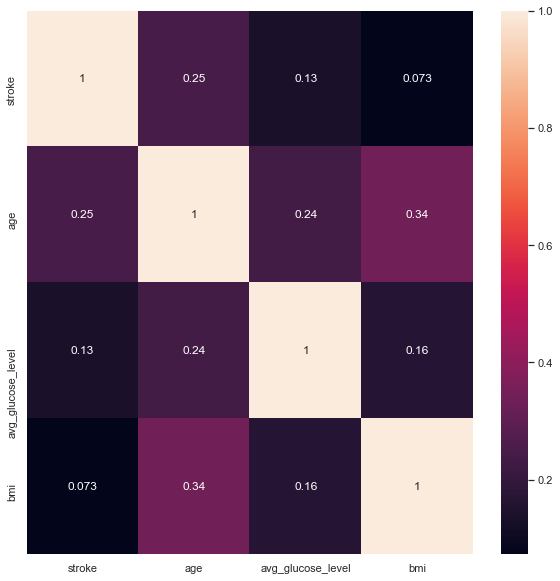

In [905]:
fig, ax = plt.subplots(figsize=(10,10))
sns.heatmap(df[['stroke', 'age', 'avg_glucose_level', 'bmi']].corr(),annot=True)

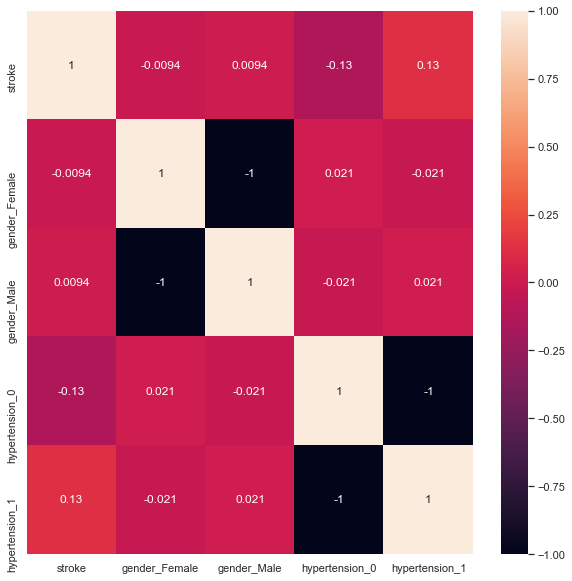

In [906]:
fig, ax = plt.subplots(figsize=(10,10))
sns.heatmap(df[['stroke','gender_Female', 'gender_Male', 'hypertension_0', 'hypertension_1']].corr(),annot=True)

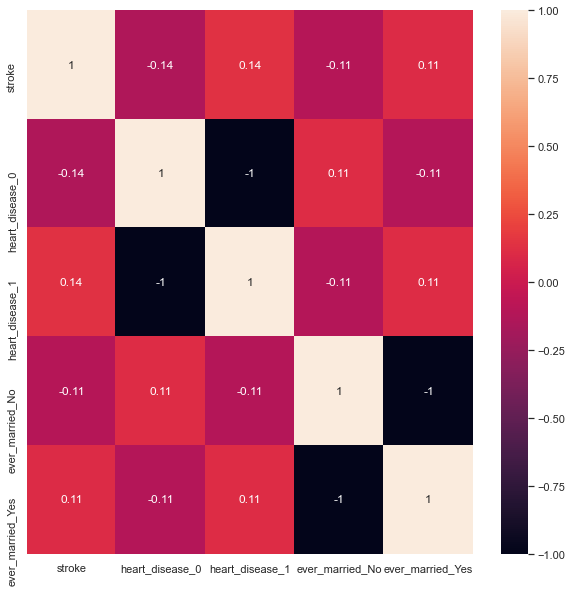

In [907]:
fig, ax = plt.subplots(figsize=(10,10))
sns.heatmap(df[['stroke','heart_disease_0', 'heart_disease_1', 'ever_married_No','ever_married_Yes',]].corr(),annot=True)

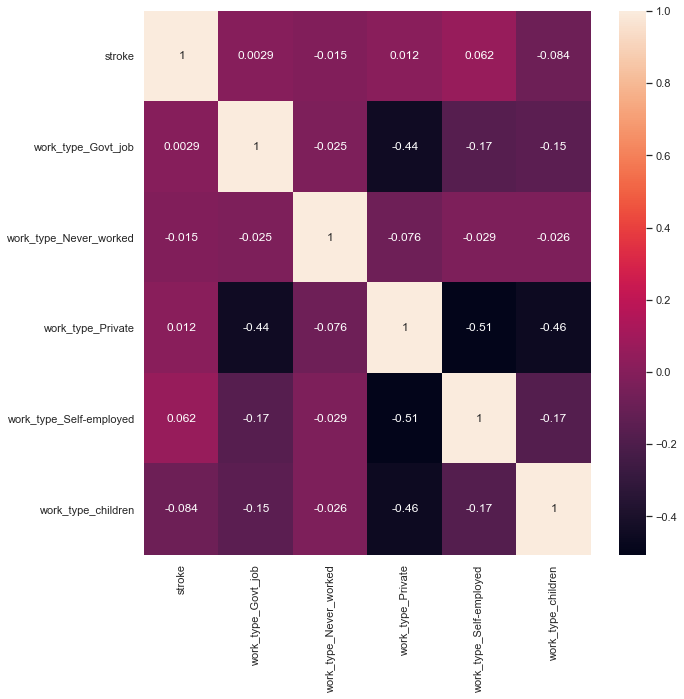

In [908]:
fig, ax = plt.subplots(figsize=(10,10))
sns.heatmap(df[['stroke','work_type_Govt_job', 'work_type_Never_worked','work_type_Private', 'work_type_Self-employed',
                'work_type_children']].corr(),annot=True)

# models

In [909]:
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.dummy import DummyClassifier
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_predict
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_recall_fscore_support
from sklearn.metrics import classification_report

ModuleNotFoundError: No module named 'imblearn'

In [ ]:
x = df.drop(columns=['stroke', 'id'])
strokes = df['stroke']

In [ ]:
standard_scaler = StandardScaler()
x_train, x_test, y_train, y_test = train_test_split(x, strokes, test_size=0.3, random_state = 42)

numerical_features = ['avg_glucose_level', 'bmi', 'age']

standard_scaler.fit(x_train[numerical_features])
x_train[numerical_features] = standard_scaler.transform(x_train[numerical_features])

standard_scaler.fit(x_test[numerical_features])
x_test[numerical_features] = standard_scaler.transform(x_test[numerical_features])

# KNN

### let's find the best k from 1 to 51

In [912]:
k_fold = KFold(n_splits=10, shuffle=True, random_state=42)
scores = []
ks = np.arange(1,51,2)

for k in ks:
    clf = KNeighborsClassifier(n_neighbors = k)
    score = cross_val_score(clf, x_train, y_train, cv=k_fold, n_jobs=1, scoring='accuracy')
    scores.append(score.mean())

In [913]:
scores

[0.9157920007682335,
 0.9471599366207328,
 0.952811254621405,
 0.9545061698756424,
 0.9542236839999362,
 0.9545061698756424,
 0.9545061698756424,
 0.9547886557513484,
 0.9547886557513484,
 0.9547886557513484,
 0.9547886557513484,
 0.9547886557513484,
 0.9547886557513484,
 0.9547886557513484,
 0.9547886557513484,
 0.9547886557513484,
 0.9547886557513484,
 0.9547886557513484,
 0.9547886557513484,
 0.9547886557513484,
 0.9547886557513484,
 0.9547886557513484,
 0.9547886557513484,
 0.9547886557513484,
 0.9547886557513484]

In [914]:
knn = KNeighborsClassifier(n_neighbors=10)
knn.fit(x_train, y_train)
prediction = knn.predict(x_test)
confusion_matrix(y_test, prediction)

array([[1429,    0],
       [  89,    0]], dtype=int64)

### the model is a dummy model because there are a lot more cases of not having a stroke than having a stroke. even though it looks like the model got great scores, the model didn't detect anyone that had a stroke.

In [915]:
precision_recall_fscore_support(y_test, prediction)

C:\Users\User\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


(array([0.94137022, 0.        ]),
 array([1., 0.]),
 array([0.9697998, 0.       ]),
 array([1429,   89], dtype=int64))

In [916]:
print(classification_report(y_test, prediction))

              precision    recall  f1-score   support

           0       0.94      1.00      0.97      1429
           1       0.00      0.00      0.00        89

    accuracy                           0.94      1518
   macro avg       0.47      0.50      0.48      1518
weighted avg       0.89      0.94      0.91      1518



#### in the classification report, the precision tells us that out of all the cases the model identified as "not had a stroke", 94% of them were true. the recall tells us that all the cases that are "not had a stroke" were detected as "not had a stroke".

#### it means that the model guessed every case as "not had a stroke"

In [917]:
clf = DecisionTreeClassifier()
score = cross_val_score(clf, x_train, y_train, cv=k_fold, n_jobs=1, scoring='accuracy')
score

array([0.86723164, 0.93502825, 0.92937853, 0.93220339, 0.90112994,
       0.91525424, 0.9180791 , 0.92372881, 0.90960452, 0.898017  ])

In [928]:
a = np.asarray(score)
a.mean()

0.9129655415246235

In [919]:
DTC = DecisionTreeClassifier()
DTC.fit(x_train, y_train)
prediction = DTC.predict(x_test)
confusion_matrix(y_test, prediction)

array([[1362,   67],
       [  76,   13]], dtype=int64)

In [920]:
print(classification_report(y_test, prediction))

              precision    recall  f1-score   support

           0       0.95      0.95      0.95      1429
           1       0.16      0.15      0.15        89

    accuracy                           0.91      1518
   macro avg       0.55      0.55      0.55      1518
weighted avg       0.90      0.91      0.90      1518



### the decision tree did manage to detect 15% of the "had a stroke" cases successfully while still getting a high accuracy on the "not had a stroke" cases